# Telco Customer Churn



Predict behavior to retain customers. Analyze all relevant customer data and develop focused customer retention programs.

Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Business Problem

The objective of this project is to predict customer churn in a telecom company. Customer Churn is the rate at which customers stop doin business with a company or discontinue their services. For that, predicting and understanding this churn is important for businesses and the company in order to retain their valuable customer. For that: 

- Develop a machine learning model that can predict customers who will leave the company.

*Understanding the Dataset*
  - "Churn" represents the customers who left within the last month
  - Service that each customers has signed up for
  - Customer account information 
  - Demographic info about customers


## Step 1: Data Collection

In [1]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Read the dataset
base = pd.read_csv("Telco-Customer-Churn.csv")
base.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Step 2: Data Cleaning

In [3]:
# Informations
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There's not null values

In [4]:
# shape
base.shape

(7043, 21)

In [5]:
# Transform "TotalCharges" column to numeric 
base["TotalCharges"] = pd.to_numeric(base["TotalCharges"], errors="coerce")


In [6]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# View the missing values

base["TotalCharges"].isnull().sum()


11

In [8]:
base["SeniorCitizen"] = base["SeniorCitizen"].replace({1: "Yes", 0: "No"}).astype(str)

In [9]:
# Remove NaNs
base = base.dropna()

In [10]:
# View the the dataset again
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## Step 3: Exploratory Analytics and Visualization

In [11]:
# Get the summary statistics for numerical columns
print(base.describe())

            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000


#### How many clients left the company?


In [12]:
churn_counts = base['Churn'].value_counts()
print(churn_counts)

No     5163
Yes    1869
Name: Churn, dtype: int64


- 1.869 clients have churned


#### What's the percentage of Clients who left the company last month?

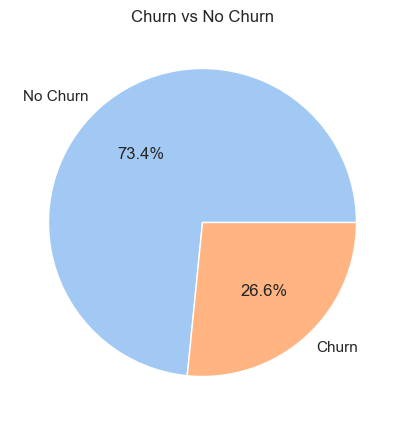

In [13]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid", palette="pastel")
plt.pie(base["Churn"].value_counts(), labels=["No Churn","Churn"], autopct="%1.1f%%")
plt.title("Churn vs No Churn")

plt.show()

- Only 26,6% of customers have churned. 

#### Exploratory data analysis to understand better of independent variables with customer churn, by analyzing the demographic columns

- The graphics show the following visualization presents the percentage of churn (customers who have terminated their service). In this context, 'Yes' indicates that the customer meets a certain condition (for exemple, has a partner, is a senior citizen or has depedents), while 'No' implies that the customer does not meet that condition. 

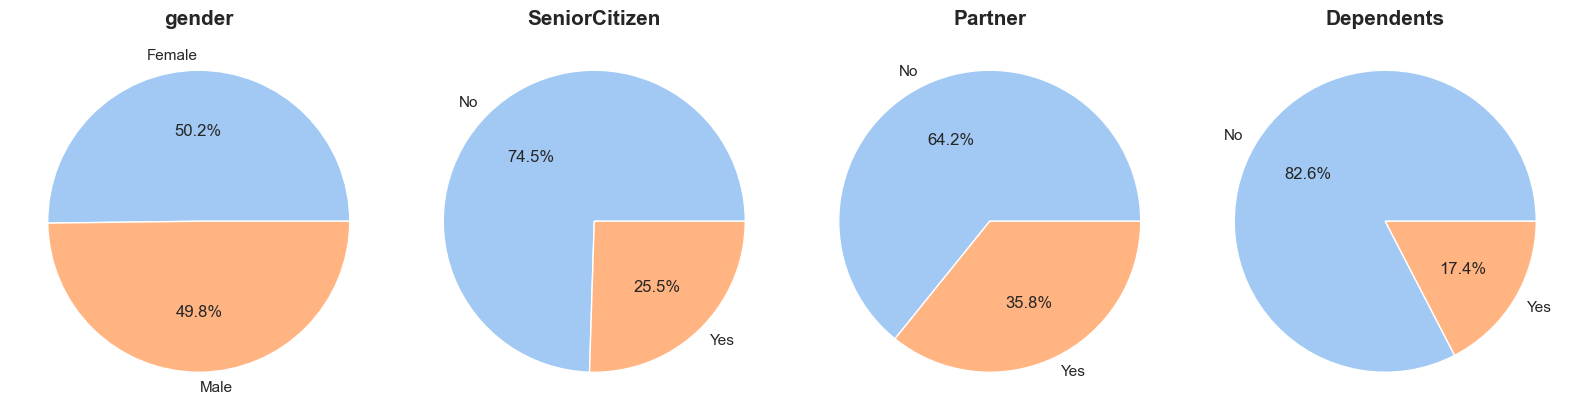

In [14]:
# List of columns to visualize
columns_to_visualize1 = ["gender", "SeniorCitizen", "Partner", "Dependents"]

# Data Visualization - Pie charts for each column
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid", palette="pastel")  # Setting style and color palette

for i, col in enumerate(columns_to_visualize1, 1):
    plt.subplot(1, len(columns_to_visualize1), i)
    
    # Calculate counts and percentages for each category in the column based on "Churn"
    churn_percentages = base[base["Churn"] == "Yes"][col].value_counts(normalize=True).mul(100).round(1)

    plt.pie(churn_percentages, labels=churn_percentages.index, autopct='%1.1f%%', palette="pastel")
    plt.title(f"{col}", fontsize=15, fontweight="bold")

    

plt.tight_layout()
plt.show()


In real world, users tend to churn their services if the monthly subscription cost is too high. Check if that behavior happens in the dataset:

#### See the relationship between customer churn and monthly charges

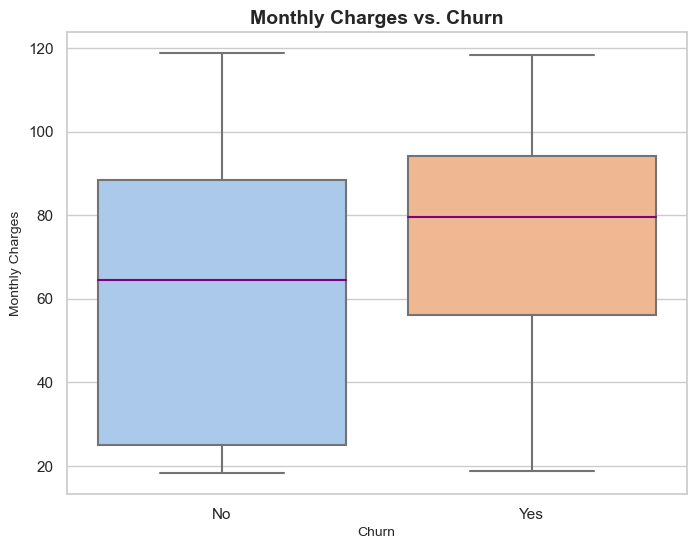

In [15]:
# Box plot with style and palette
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid", palette="pastel")  # Setting style and color palette
sns.boxplot(x="Churn", y="MonthlyCharges", data=base, medianprops={"color": "purple"})
plt.title("Monthly Charges vs. Churn", fontsize=14, fontweight="bold")
plt.xlabel("Churn", fontsize=10)
plt.ylabel("Monthly Charges", fontsize=10)
plt.show()

# MonthlyCharges: Amount charged to the customer monthly

The assumption above is correct. Customers who churned have a high median monthly charge than others who did not churn.
It can saw through the median line in the boxplot.

#### See the relationship between customer churn and services columns

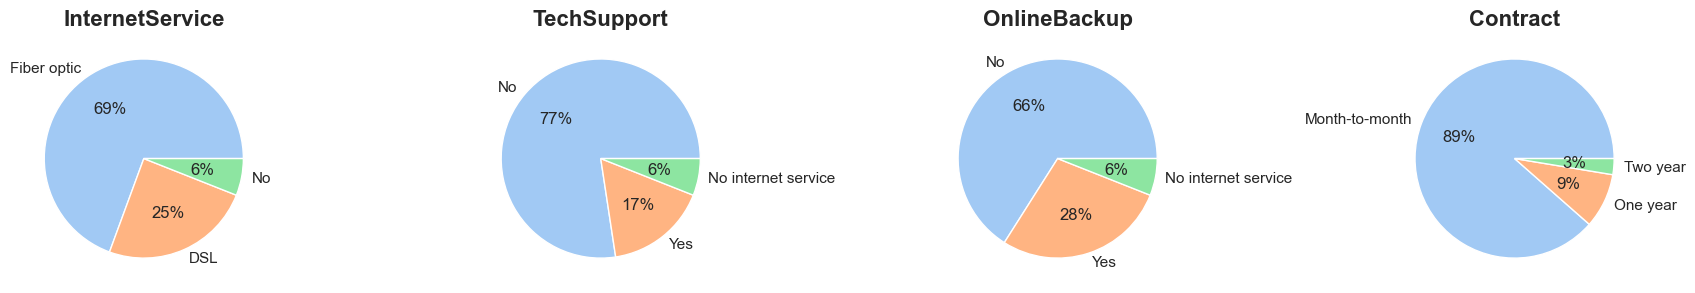

In [16]:
# List of columns to visualize
columns_to_visualize2 = ["InternetService", "TechSupport", "OnlineBackup", "Contract"]

# Data Visualization - Pie charts for each column
plt.figure(figsize=(17, 9))
sns.set(style="whitegrid", palette="pastel")  

for i, col in enumerate(columns_to_visualize2, 1):
    plt.subplot(1, len(columns_to_visualize2), i)
    
    # Calculate counts and percentages for each category in the column based on "Churn"
    churn_percentages = base[base["Churn"] == "Yes"][col].value_counts(normalize=True).mul(100).round(1)

    plt.pie(churn_percentages, labels=churn_percentages.index, autopct="%1.0f%%", palette="pastel")
    plt.title(f"{col}", fontsize=16, fontweight="bold")

    

plt.tight_layout()
plt.show()


### Analyzing each column:

**1. InternetService:** 66% of customers who use fiber optic internet churn more often than others. It might be related to an expensive service, or this provider does not have good coverage.

**2. TechSupport:** 77% of customers who churned did not sign up for tech support. It might mean that these users did not recieve any guidance on fixing technical issues and decided to stop using the service. Just 17% of Churn had a TechSupport

**3. OnlineBackup:** 66% of customers who churned did not sign up for an online backup service for data storage.

**4. Contract:** 89% of customers who churned had a monthly contract. This is possible because they had payed by month which was easier to cancel their subscription before the next payment cycle.

#### See the distribution of the Tenure column

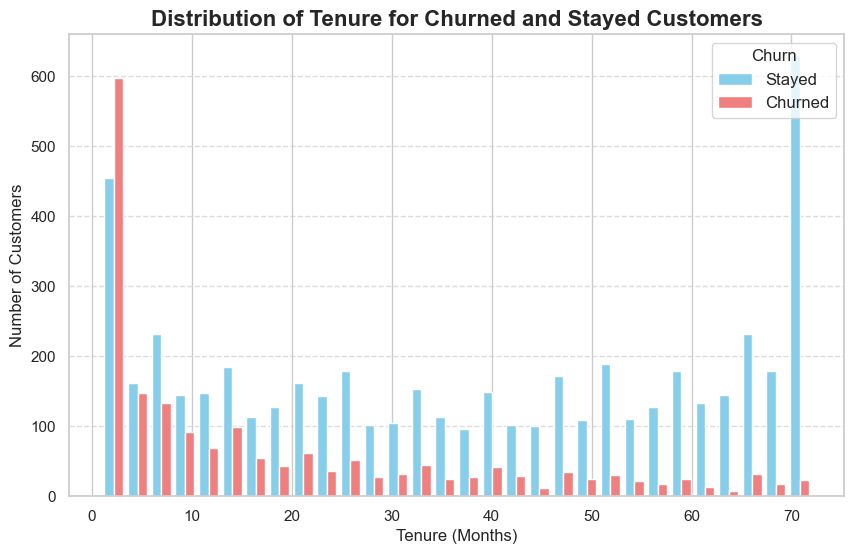

In [17]:
# Data for Churned and Stayed Customers
churn_tenure_yes = base[base.Churn == "Yes"].tenure
churn_tenure_no = base[base.Churn == "No"].tenure


plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", palette="pastel")  
plt.hist([churn_tenure_no, churn_tenure_yes], bins=30, color=["skyblue", "lightcoral"], label=["Stayed", "Churned"])
plt.title("Distribution of Tenure for Churned and Stayed Customers", fontsize=16, fontweight='bold')
plt.xlabel("Tenure (Months)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.legend(title="Churn", fontsize=12, title_fontsize=12, loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


- The graphic shows that new customers tend to stop using the company's services. However, customers who remain longer time(tenure increases) with the company, the probability of churning decreases. This discovery suggests that they tend to become more loyal over the time.


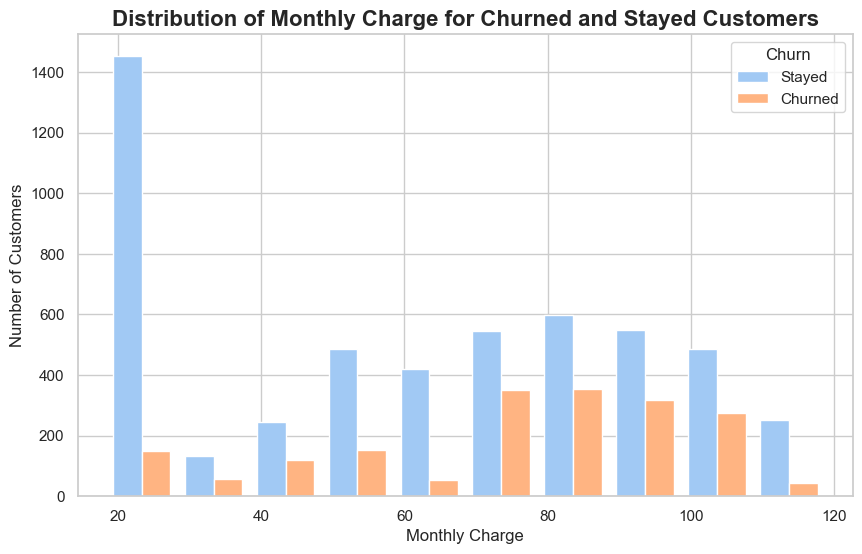

In [18]:
mcharge_yes = base[base.Churn == "Yes"].MonthlyCharges
mcharge_no = base[base.Churn == "No"].MonthlyCharges

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", palette="pastel")  
plt.hist([mcharge_no, mcharge_yes], label=["Stayed", "Churned"])
plt.title("Distribution of Monthly Charge for Churned and Stayed Customers", fontsize=16, fontweight="bold")
plt.xlabel("Monthly Charge", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.legend(title="Churn")
plt.show()

- The graphic shows that customers with lower monthly charges between 70 and 100 tend to churn more frequently. The company should make a pricing optimization and retention strategies.


## Step 4: Feature Engineering

In [19]:
def unique_value(base):
    for column in base:
        print(f"column: {column}\n {base[column].unique()}")
unique_value(base)

column: customerID
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
column: gender
 ['Female' 'Male']
column: SeniorCitizen
 ['No' 'Yes']
column: Partner
 ['Yes' 'No']
column: Dependents
 ['No' 'Yes']
column: tenure
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
column: PhoneService
 ['No' 'Yes']
column: MultipleLines
 ['No phone service' 'No' 'Yes']
column: InternetService
 ['DSL' 'Fiber optic' 'No']
column: OnlineSecurity
 ['No' 'Yes' 'No internet service']
column: OnlineBackup
 ['Yes' 'No' 'No internet service']
column: DeviceProtection
 ['No' 'Yes' 'No internet service']
column: TechSupport
 ['No' 'Yes' 'No internet service']
column: StreamingTV
 ['No' 'Yes' 'No internet service']
column: StreamingMovies
 ['No' 'Yes' 'No internet service']
column: Contract
 ['Month-to-month'

In [20]:
base["SeniorCitizen"] = base["SeniorCitizen"].replace({"Yes" :1, "No": 0}).astype(int)

In [21]:
base.replace("No phone service", "No", inplace=True)


In [22]:
replace_col = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
base[replace_col] = base[replace_col].replace("No internet service", "No")

In [23]:
unique_value(base)

column: customerID
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
column: gender
 ['Female' 'Male']
column: SeniorCitizen
 [0 1]
column: Partner
 ['Yes' 'No']
column: Dependents
 ['No' 'Yes']
column: tenure
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
column: PhoneService
 ['No' 'Yes']
column: MultipleLines
 ['No' 'Yes']
column: InternetService
 ['DSL' 'Fiber optic' 'No']
column: OnlineSecurity
 ['No' 'Yes']
column: OnlineBackup
 ['Yes' 'No']
column: DeviceProtection
 ['No' 'Yes']
column: TechSupport
 ['No' 'Yes']
column: StreamingTV
 ['No' 'Yes']
column: StreamingMovies
 ['No' 'Yes']
column: Contract
 ['Month-to-month' 'One year' 'Two year']
column: PaperlessBilling
 ['Yes' 'No']
column: PaymentMethod
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit 

Simplify the data by treating both "No phone service" and "No internet service" as just "No" because they mean the same thing, it makes easier for machine learning models and avoid confusion during model training.

#### Encoding Categorical Variables


In [24]:
cat_var = base.drop(["customerID","TotalCharges", "MonthlyCharges","SeniorCitizen","tenure"], axis=1)

cat_var.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


The categorical variables in the base need to be converted to a numeric format before a machine learning step.

In [25]:
from sklearn import preprocessing

In [26]:
le = preprocessing.LabelEncoder()

base_cat = cat_var.apply(le.fit_transform)
base_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,3,0
2,1,0,0,1,0,0,1,1,0,0,0,0,0,1,3,1
3,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


0 = No
1 = yes 

In [27]:
# Merge dataframe created with previous one

num_features = base[["customerID","TotalCharges", "MonthlyCharges","SeniorCitizen","tenure"]]
finalbase = pd.merge(num_features, base_cat, left_index=True, right_index=True)


finalbase

,customerID,TotalCharges,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,29.85,29.85,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,2,0
1,5575-GNVDE,1889.50,56.95,0,34,1,0,0,1,0,...,1,0,1,0,0,0,1,0,3,0
2,3668-QPYBK,108.15,53.85,0,2,1,0,0,1,0,...,1,1,0,0,0,0,0,1,3,1
3,7795-CFOCW,1840.75,42.30,0,45,1,0,0,0,0,...,1,0,1,1,0,0,1,0,0,0
4,9237-HQITU,151.65,70.70,0,2,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1990.50,84.80,0,24,1,1,1,1,1,...,1,0,1,1,1,1,1,1,3,0
7039,2234-XADUH,7362.90,103.20,0,72,0,1,1,1,1,...,0,1,1,0,1,1,1,1,1,0
7040,4801-JZAZL,346.45,29.60,0,11,0,1,1,0,0,...,1,0,0,0,0,0,0,1,2,0
7041,8361-LTMKD,306.60,74.40,1,4,1,1,0,1,1,...,0,0,0,0,0,0,0,1,3,1


In [28]:
from sklearn.preprocessing import RobustScaler


# Select the numerical columns for standardization
num_columns = ["TotalCharges", "MonthlyCharges", "tenure"]

scaler = RobustScaler()
finalbase[num_columns] = scaler.fit_transform(finalbase[num_columns])

finalbase

,customerID,TotalCharges,MonthlyCharges,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,-0.403038,-0.746200,0,-0.608696,0,1,0,0,0,...,0,1,0,0,0,0,0,1,2,0
1,5575-GNVDE,0.145000,-0.246891,0,0.108696,1,0,0,1,0,...,1,0,1,0,0,0,1,0,3,0
2,3668-QPYBK,-0.379963,-0.304007,0,-0.586957,1,0,0,1,0,...,1,1,0,0,0,0,0,1,3,1
3,7795-CFOCW,0.130633,-0.516813,0,0.347826,1,0,0,0,0,...,1,0,1,1,0,0,1,0,0,0
4,9237-HQITU,-0.367144,0.006449,0,-0.586957,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0.174764,0.266237,0,-0.108696,1,1,1,1,1,...,1,0,1,1,1,1,1,1,3,0
7039,2234-XADUH,1.758008,0.605251,0,0.934783,0,1,1,1,1,...,0,1,1,0,1,1,1,1,1,0
7040,4801-JZAZL,-0.309737,-0.750806,0,-0.391304,0,1,1,0,0,...,1,0,0,0,0,0,0,1,2,0
7041,8361-LTMKD,-0.321480,0.074620,1,-0.543478,1,1,0,1,1,...,0,0,0,0,0,0,0,1,3,1


## Step 5: Model Selection

In [29]:
# Drop rows with missing values
finalbase = finalbase.dropna()
# Drop the customerID column
finalbase = finalbase.drop("customerID", axis=1)

In [30]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = finalbase.drop(["Churn"], axis=1)
y = finalbase["Churn"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Step 6: Prediction Model

### Logistic Regression


In [31]:
from sklearn.linear_model import LogisticRegression


In [32]:
# Create and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42).fit(X_train, y_train)

In [33]:
# Prediction 
y_pred_lr = lr_model.predict(X_test)

### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [36]:
# Prediction
y_pred_rf = rf_model.predict(X_test)

### XGB Classifier

In [37]:
!pip install xgboost


In [38]:
from xgboost import XGBClassifier

In [39]:
# Create and train the XGBoost model
xgb_model = XGBClassifier(random_state=42).fit(X_train, y_train)

In [40]:
# Prediction
y_pred_xgb = xgb_model.predict(X_test)

## Step 7: Model Evaluation

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
# Calculate accuracy scores
lr_accuracy = accuracy_score(y_test, y_pred_lr)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

# Print accuracy scores
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")


Logistic Regression Accuracy: 0.80
Random Forest Accuracy: 0.78
XGBoost Accuracy: 0.78


In [45]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Extract the number of true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = conf_matrix.ravel()

# Print the number of predicted churn cases
print(f"Number of Predicted Churn Cases: {tp + fp}")


Number of Predicted Churn Cases: 460


## Conclusions

Customer Churn Analysis 

The number of Predicted Customer Churn with 80% of Accuracy is 460.

1. **Churn Overview:**
   - Churn rate: 26.6% of customers decided to switch services.
   - Demographics: 25.5% of senior citizens and 74.5% of younger individuals churned.

2. **Influence of Relationships:**
   - Partnerships: 64.2% without a partner, 35.8% with a partner churned.
   - Dependents: 82.6% without dependents, 17.4% with dependents churned.

3. **Service Impact:**
   - Fiber Optic Users: A substantial number of Fiber Optic users churned.
   - Tech Support and Online Backup: 77% without Tech Support and 66% without Online Backup churned.

4. **Payment Plans:**
   - Monthly Payments: 89% of Month-to-Month clients churned.

5. **Billing Insights:**
   - Higher Charges: Churning customers have a higher median monthly charge.
   - New Customers: New customers tend to discontinuing services.

6. **Loyalty and Tenure:**
   - Tenure Effect: Longer tenure correlates with lower churn probability.
   - Loyal Customers: Longer tenure suggests increased customer loyalty.

## Recommendations for the Company

Recomendations:

**Enhance New Customer Onboarding:**
   - Improve the initial experience for new customers to encourage retention.

**Focus on Partner and Dependent Groups:**
   - Offer tailored services or incentives for customers without partners or dependents.

**Fiber Optic Service Improvement:**
   - Address concerns of Fiber Optic users to improve satisfaction and retention.

**Tech Support and Online Backup:**
   - Strengthen Tech Support and Online Backup services to reduce churn.

**Monthly Payment Plan Refinement:**
   - Provide incentives for Month-to-Month customers to consider longer-term plans.

**Promote Long-Term Engagement:**
   - Implement strategies to maintain customer loyalty over time.

By analysing churn patterns and acting upon the outlined recommendations, the company can reduce churn rates, enhance customer satisfaction, and foster long-term relationships, ultimately leading to improved business success.
